Integrantes do grupo:
1. Hugo
2. André Cerqueira
3. Dayane
4. Daniel Tunnermman
5. Pedro Rabelo
6. Rosimeire
7. Carolina

# Programação Dinâmica

In [ ]:
import pprint
import numpy as np
import itertools
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

## Agente e Ambiente

Dado o agente e o ambiente a seguir:

O espaço de ações é uma lista composta por **cima**, **baixo**, **esquerda** e **direita**. Possibilidades de movimento do agente ao longo do plano.

Os estados são representados por duas coordenadas. Um estado em si é uma lista com as coordenadas **[Y, X]** a troca em relação ao convencional (x,y) facilita a programação do ambiente.

Na imagem é possível ver as recompensas ao chegar em cada estado, sendo o estado verde TERMINAL. Os estados em cinza representam paredes, terreno não navegável pelo agente. Por fim, caso o agente não seja capaz de terminar o episódio chegando ao estado terminal, o mesmo termina a execução após 30 passos.

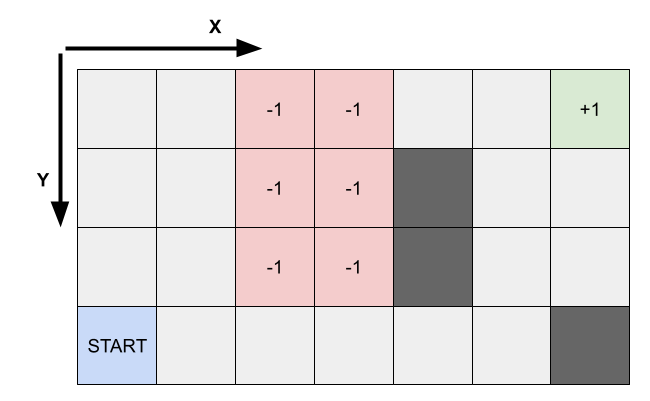

In [ ]:
# Alumas variáveis globais
UP, DOWN, LEFT, RIGHT = "UP", "DOWN", "LEFT", "RIGHT"
GRID_SHAPE = (4, 7)
UNICODE_ARROWS = {"UP": "\u2191", "DOWN": "\u2193", "LEFT": "\u2190", "RIGHT": "\u2192"}

In [ ]:
class Agent():
    def __init__(self,
                 action_space,
                #  grid_shape,
                 ):

        self.action_space = action_space
        self.policy = [
            [UP, UP, UP, UP, UP, UP, UP],
            [UP, UP, UP, UP, UP, UP, UP],
            [UP, UP, UP, UP, UP, UP, UP],
            [UP, UP, UP, UP, UP, UP, UP],
             ]
        # generic agent -------
        # self.policy = np.random.choice(self.action_space, size=grid_shape)

        self.v = np.array( [
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             ] )
        # generic agent -------
        # self.v = np.zeros(shape=grid_shape)

    def choose_action(self, obs):

        action = self.policy[obs[0]][obs[1]]

        return action

    def show_value_function(self):
        fig, ax = plt.subplots()
        ax.set_title("V(s)")
        ax.matshow(self.v, cmap='winter')
        for (i, j), z in np.ndenumerate(self.v):
            ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
        # pprint.pprint(self.v)
        plt.show()

    def show_policy(self):
        fig, ax = plt.subplots()
        ax.set_title("pi(s)")
        ax.matshow(self.v, cmap="winter")
        for (i, j), z in np.ndenumerate(self.policy):
            ax.text(j, i, UNICODE_ARROWS[z], ha='center', va='center', fontsize="xx-large")
        # pprint.pprint(self.v)
        plt.show()


In [ ]:

class Environment():
    def __init__(self):

        self.start_state = [3, 0]
        self.action_space = [UP, DOWN, LEFT, RIGHT]
        self.current_state = self.start_state
        self.timestep = 0
        self.reward_function = np.array( [
            [0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0],
            [0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0],
            [0.0, 0.0,  0.0,  0.0, 0.0, 0.0, 0.0],
             ] )
        self.walkable_terrain = np.array( [
            [True, True, True, True, True, True, True],
            [True, True, True, True, False, True, True],
            [True, True, True, True, False, True, True],
            [True, True, True, True, True, True, False],
             ] )
        self.terminal_states = [[0, 6]]

    def _transition_function(self, current_state, action):

        if action == "UP":
            desired_state = [current_state[0]-1, current_state[1]]
        elif action == "DOWN":
            desired_state = [current_state[0]+1, current_state[1]]
        elif action == "LEFT":
            desired_state = [current_state[0], current_state[1]-1]
        elif action == "RIGHT":
            desired_state = [current_state[0], current_state[1]+1]
        else:
            raise Exception("Action | {} | outside the action space".format(action))

        # Check if the desired state is inside the grid
        if ( desired_state[0] < self.walkable_terrain.shape[0] and
            desired_state[1] < self.walkable_terrain.shape[1] and
            desired_state[0] >= 0 and
            desired_state[1] >= 0  ):

            # Should the desired state be inside the grid, check if it's walkable
            if self.walkable_terrain[desired_state[0]][desired_state[1]]:
                current_state = desired_state

        # If neither condition is met then the state remains unchanged i.e. he bumped into a wall
        return current_state


    def step(self, action):
        action = str(action)
        self.current_state = self._transition_function(self.current_state, action)
        obs = self.current_state
        reward = self.reward_function[self.current_state[0]][self.current_state[1]]
        done = (self.current_state in self.terminal_states)
        info = {}
        self.timestep += 1
        if self.timestep >= 30:
            done = True

        return obs, reward, done, info

    def reset(self, custom_start=None):
        # !!! O custom_start não é usual e está presente aqui somente para realizar a
        # avaliação de políticas exatamente como descrita na teoria

        if custom_start:
            self.current_state = custom_start
        else:
            self.current_state = self.start_state
        self.timestep = 0
        obs = self.current_state

        return obs

## Loop de Interação


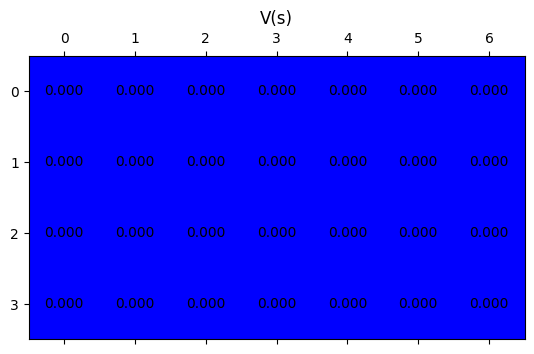

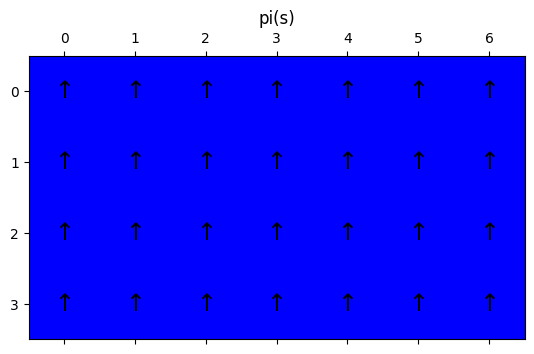

Trajectory:
[[3, 0], [2, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
['UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP']


In [ ]:
# Inicializar ambiente
# Enquanto o epsidodio nao acabar
    # escolher ação
    # aplicar ação no ambiente
    # guardar transições

env = Environment()
agent = Agent(action_space=env.action_space)

states = []
actions = []
rewards = []

s = env.reset()
done = False
while not done:

    a = agent.choose_action(s)

    next_s, r, done, info = env.step(a)

    states.append(s)
    actions.append(a)
    rewards.append(r)

    s = next_s

agent.show_value_function()
agent.show_policy()
print("Trajectory:")
print(states)
print(actions)

## Atualização da Função Valor - *Policy Evaluation*

Atualize os valores da função de valor V(s) de acordo com a equação de Bellman e o algoritmo na imagem. Vale lembrar que, no ambiente atual, as probabilidades de mudança de estados e ação tomada pela política são sempre 100%.


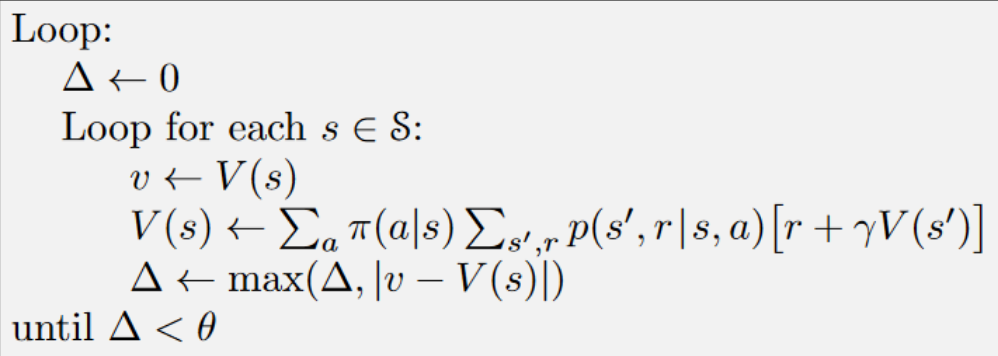

In [ ]:
# Para facilitar os experimentos, fazemos aqui uma lista de estados com todos os estados exceto o estado terminal
all_but_terminal = list(itertools.product(range(GRID_SHAPE[0]), range(GRID_SHAPE[1])))
all_but_terminal.remove((0,6))
# tirar paredes também
all_but_terminal.remove((1,4))
all_but_terminal.remove((2,4))
all_but_terminal.remove((3,6))

In [ ]:
all_but_terminal

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 5),
 (1, 6),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 5),
 (2, 6),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5)]

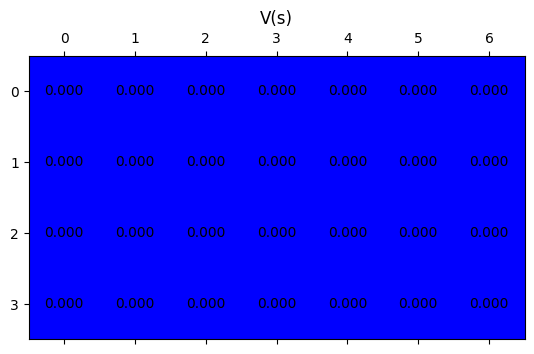

3.439
0.8999999999999999
0.81
0.7290000000000001
0.6561000000000003
0.59049
0.531441
0.47829690000000014
0.43046720999999977
0.38742048900000015
0.3486784401000005
0.3138105960899997
0.28242953648099967
0.25418658283289997
0.2287679245496097
0.20589113209465015
0.18530201888518505
0.16677181699666477
0.1500946352969983
0.13508517176729917
0.12157665459056943
0.10941898913151249
0.0984770902183616
0.08862938119652597
0.0797664430768723
0.0717897987691849
0.06461081889226605
0.05814973700304016
0.052334763302736675
0.047101286972463186
-------------------------------------------


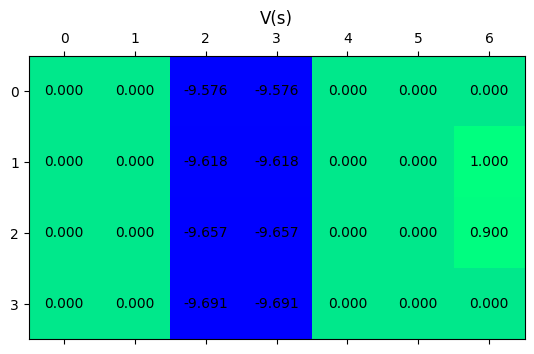

Number of Loops
30


In [ ]:
env = Environment()
agent = Agent(action_space=env.action_space)

#agent.show_value_function()
#agent.show_policy()

agent.show_value_function()
GAMMA = 0.9
THETA = 0.05
stable = False
n_loops = 0
while not stable:
    delta = 0
    for y, x in all_but_terminal: #loop em estados
        old_v = agent.v[y][x]
        s = env.reset(custom_start=[y,x]) # o custom start permite iniciar em um estado que desejarmos
        a = agent.choose_action(s)
        next_s, r, done, info = env.step(a)
        # Faça o seu código no espaço abaixo --------------------
        new_value = r + GAMMA * agent.v[next_s[0]][next_s[1]]
        delta = max(delta, abs(new_value - old_v))
        agent.v[y][x] = new_value
        # -------------------------------------------------------
    print(delta)
    if delta < THETA:
        stable = True
    n_loops+=1

print("-------------------------------------------")
agent.show_value_function()
print("Number of Loops")
print(n_loops)

## Melhora de Política *Policy Improvement*
Faça um código que execute um único loop(por todos os estados) de melhora da política seguindo o algoritmo na imagem.

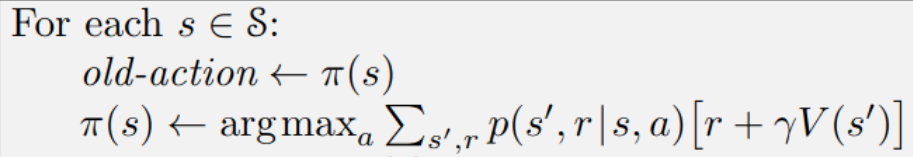

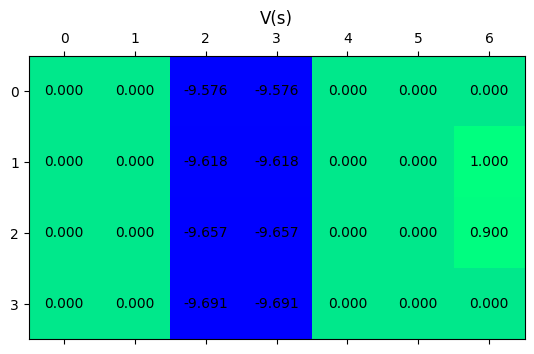

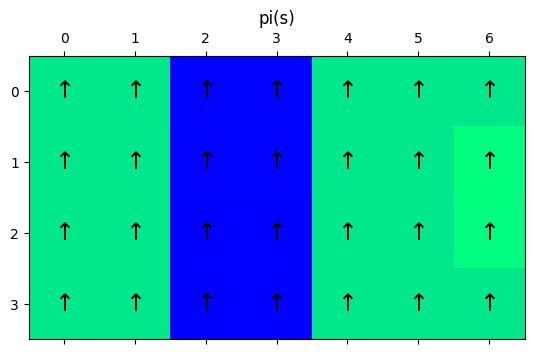

-------------------------------------------


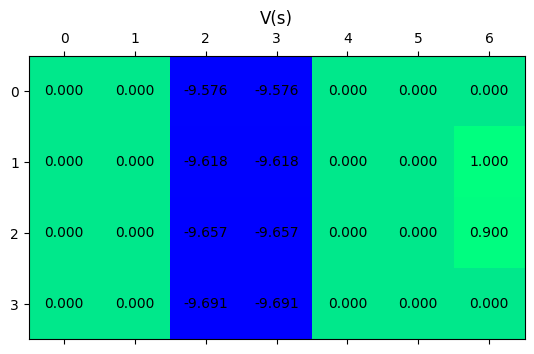

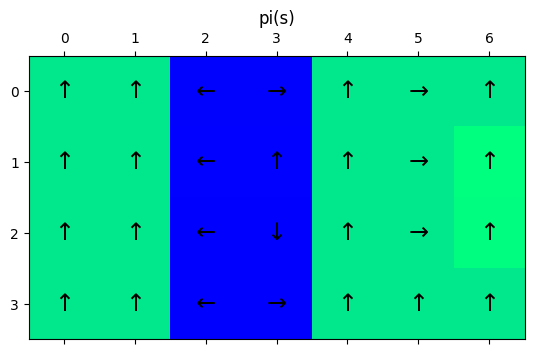

In [ ]:
# Mudar política para escolher estados com melhor retorno

# dado um estado, esta função retorna um dicionário no formato: {ação: valor da equação de Bellman}
def check_neighbors(state):
    action_values = {}
    for a in agent.action_space: #loop em ações
        s = env.reset(custom_start=state)
        next_s, r, done, info = env.step(a)
        # Faça o seu código no espaço abaixo --------------------

        action_values[a] = r + GAMMA * agent.v[next_s[0]][next_s[1]]

        # -------------------------------------------------------
    return action_values


agent.show_value_function()
agent.show_policy()

for y, x in all_but_terminal: #loop em estados
    values = check_neighbors([y, x])
    # Faça o seu código no espaço abaixo --------------------

    best_action = max(values, key=values.get)
    agent.policy[y][x] = best_action

    # -------------------------------------------------------


print("-------------------------------------------")
agent.show_value_function()
agent.show_policy()

## Iteração de Política *Policy Iteration*

Produza um algoritmo que itere sobre uma política fazendo avaliação e melhoria até sua convergência seguindo o algoritmo descrito na imagem.


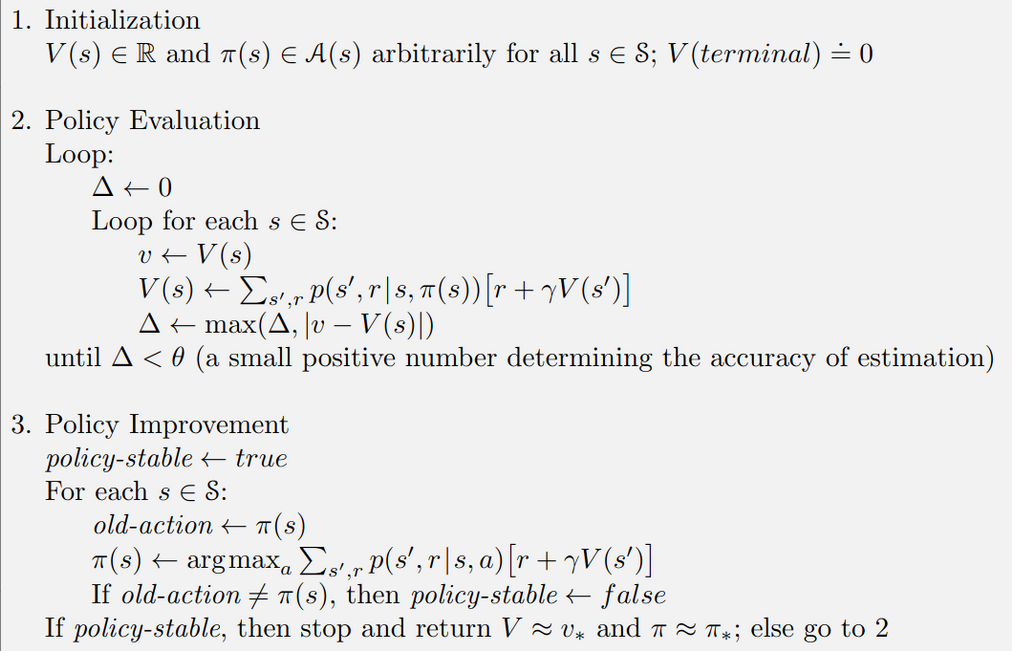

In [ ]:
'''
env = Environment()
agent = Agent(action_space=env.action_space)

GAMMA = 0.9
THETA = 0.01
n_iters = 0
# Faça o seu código no espaço abaixo --------------------











# -------------------------------------------------------

# Exiba por aqui a função de valor e política para cada passo de iteração
    n_iters+=1
    if n_iters%1 == 0:
        print("--({})--------------------".format(n_iters))
        agent.show_value_function()
        agent.show_policy()


print("converged to:")
agent.show_value_function()
agent.show_policy()'''

Delta de avaliação da política: 3.439
--(1)--------------------


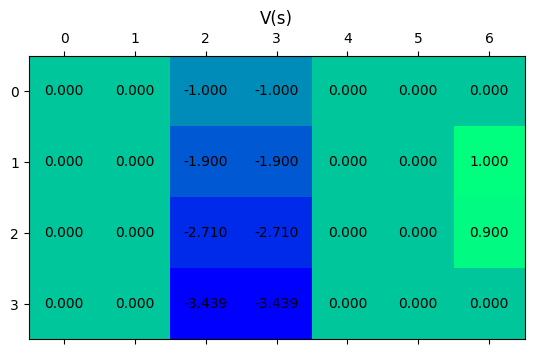

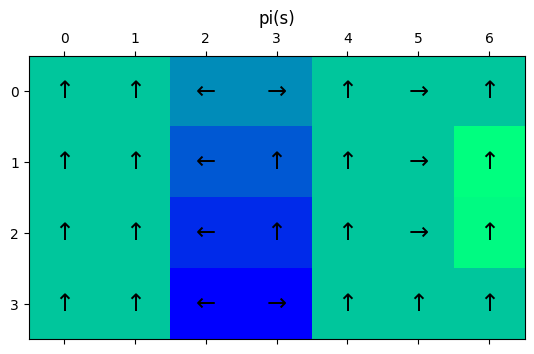

Delta de avaliação da política: 3.439
--(2)--------------------


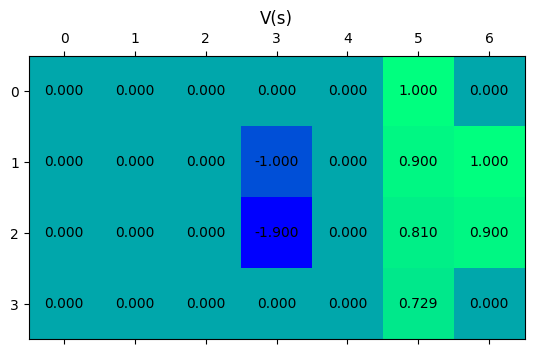

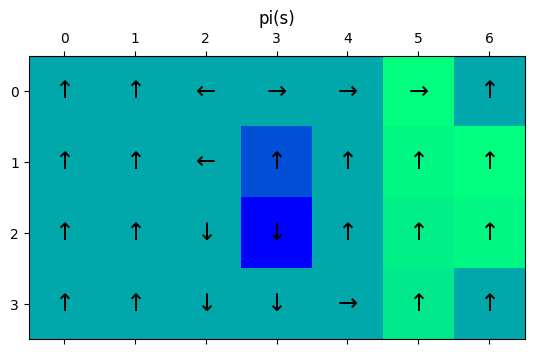

Delta de avaliação da política: 1.9
--(3)--------------------


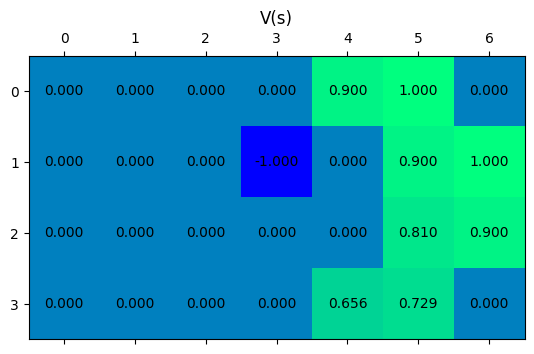

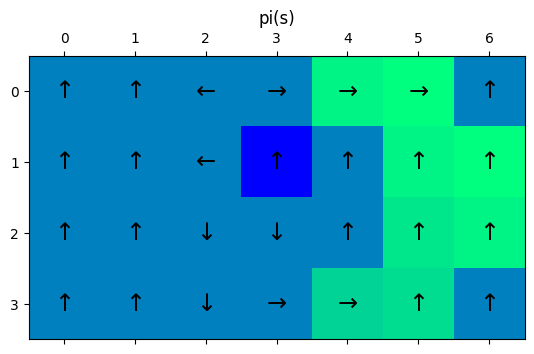

Delta de avaliação da política: 0.81
--(4)--------------------


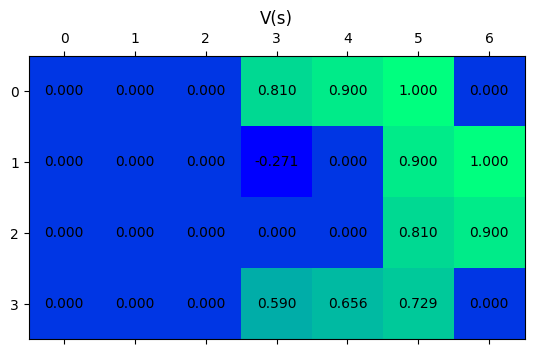

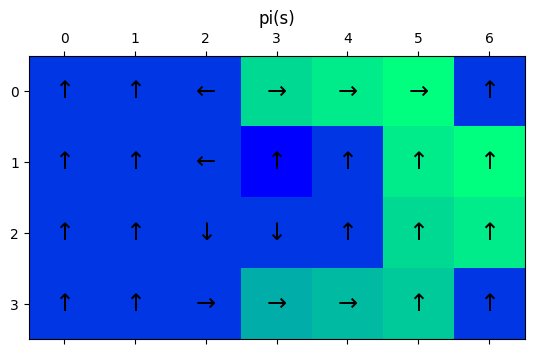

Delta de avaliação da política: 0.5314410000000002
--(5)--------------------


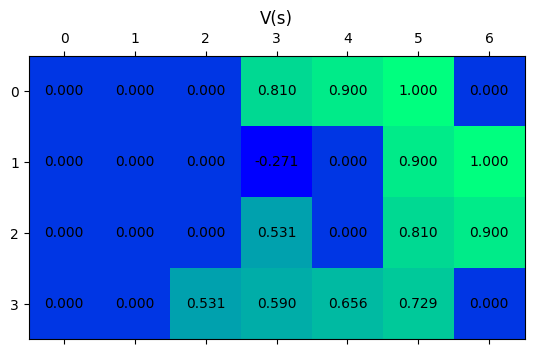

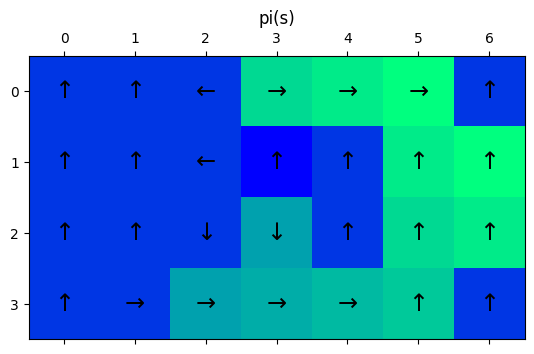

Delta de avaliação da política: 0.47829690000000014
--(6)--------------------


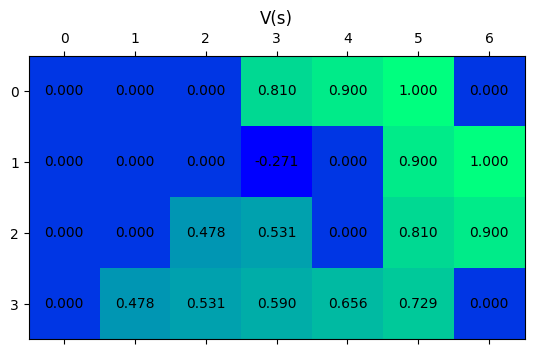

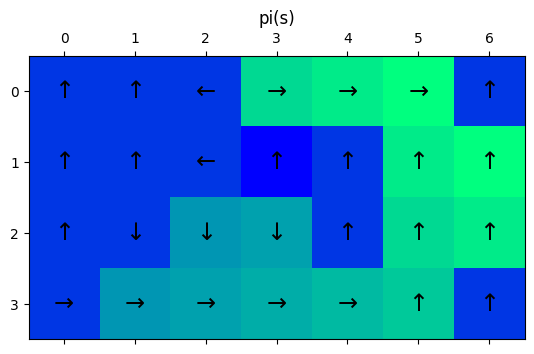

Delta de avaliação da política: 0.43046721000000016
--(7)--------------------


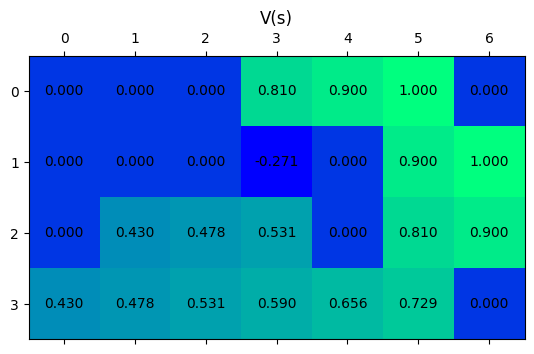

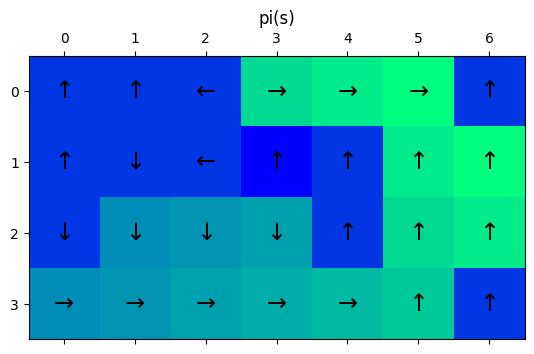

Delta de avaliação da política: 0.38742048900000015
--(8)--------------------


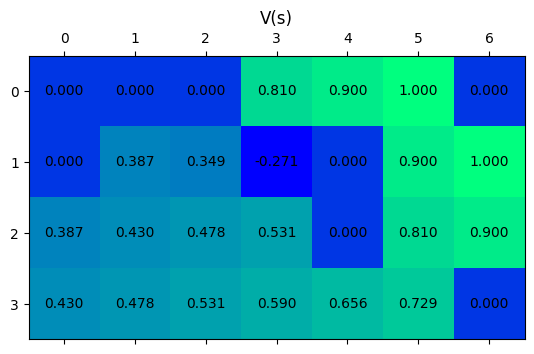

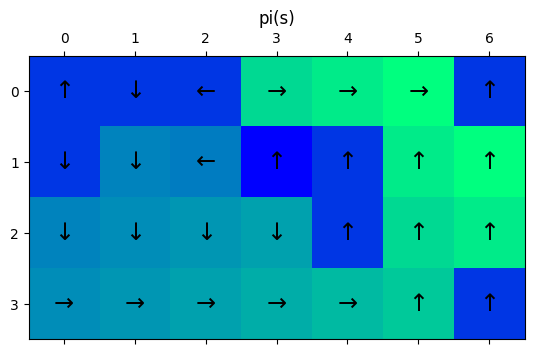

Delta de avaliação da política: 0.34867844010000015
--(9)--------------------


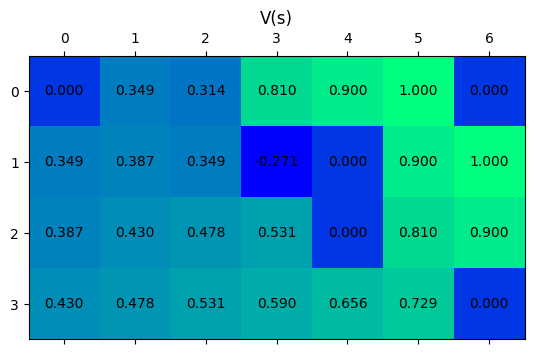

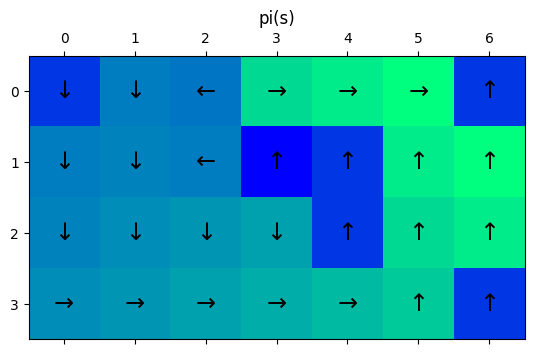

Delta de avaliação da política: 0.31381059609000017
--(10)--------------------


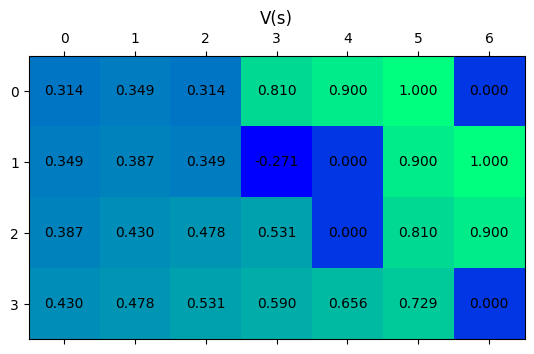

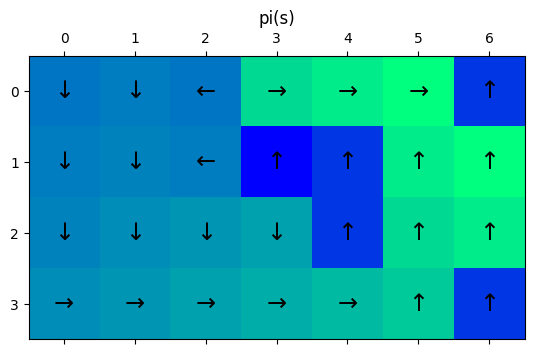

Convergência atingida após 10 iterações


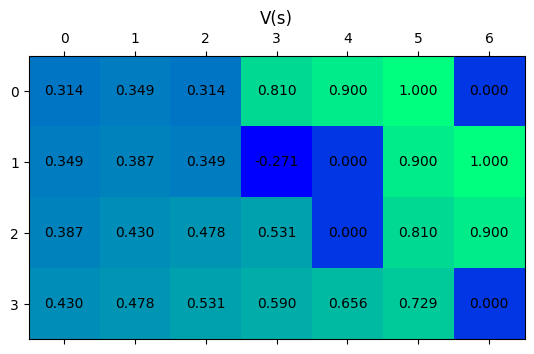

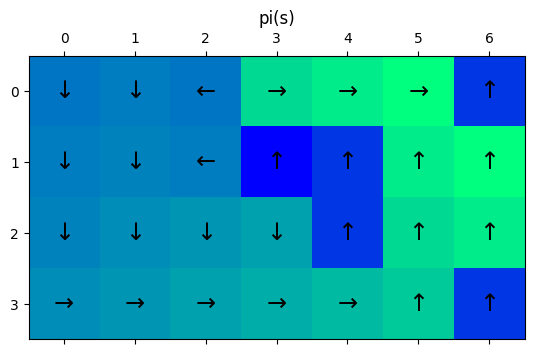

In [ ]:
env = Environment()
agent = Agent(action_space=env.action_space)

GAMMA = 0.9
THETA = 0.01
stable = False  # Para verificar se a política está estável
n_iters = 0

def policy_evaluation(agent, env, GAMMA, THETA):

    delta = 0
    for y, x in all_but_terminal:  # todos os estados, exceto os terminais
        old_v = agent.v[y][x]
        s = env.reset(custom_start=[y, x])
        a = agent.choose_action(s)
        next_s, r, done, info = env.step(a)

        # -------------------------------------------------------
        # att a função valor com base na equação de Bellman
        new_value = r + GAMMA * agent.v[next_s[0]][next_s[1]] if not done else r
        delta = max(delta, abs(new_value - old_v))
        agent.v[y][x] = new_value
        # -------------------------------------------------------

    return delta

def policy_improvement(agent, env, GAMMA):

    policy_stable = True
    for y, x in all_but_terminal:
        old_action = agent.policy[y][x]
        action_values = {}

        # Avaliar o valor de cada ação
        for a in agent.action_space:
            s = env.reset(custom_start=[y, x])  # Reseta o ambiente no estado atual
            next_s, r, done, info = env.step(a)  # Executa a ação

            # -------------------------------------------------------
            action_values[a] = r + GAMMA * agent.v[next_s[0]][next_s[1]] if not done else r
            # -------------------------------------------------------


        # -------------------------------------------------------
        # escolhe melhor ação (greedy)
        best_action = max(action_values, key=action_values.get)
        # Atualiza a política se a ação mudar
        if best_action != old_action:
            agent.policy[y][x] = best_action
            policy_stable = False  # garantia da politica mudar
        # -------------------------------------------------------

    return policy_stable

while not stable:
    # Etapa de Avaliação da Política
    delta = policy_evaluation(agent, env, GAMMA, THETA)
    print("Delta de avaliação da política:", delta)

    # Etapa de Melhora da Política
    stable = policy_improvement(agent, env, GAMMA)

    n_iters += 1
    print("--({})--------------------".format(n_iters))
    agent.show_value_function()
    agent.show_policy()

# Convergência final
print(f"Convergência atingida em {} iterações", (n_iters))
agent.show_value_function()
agent.show_policy()
